In [1]:
from ase.io import read
import numpy as np
from glob import glob

In [12]:
lmbdas= [0, 0.33, 0.66, 1.0]
trajs = [read(f"test_alcohols_restrained_fast//traj_{l}.xyz", index="9:") for l in lmbdas]

In [15]:
# extract energy from each trajectory
energies = np.zeros((len(lmbdas), len(trajs[1])))
for idx, traj in enumerate(trajs):
    print(len(traj))
    energies[idx, :] = [a.info["energy"] for a in traj[:49]]

49
49
51
51


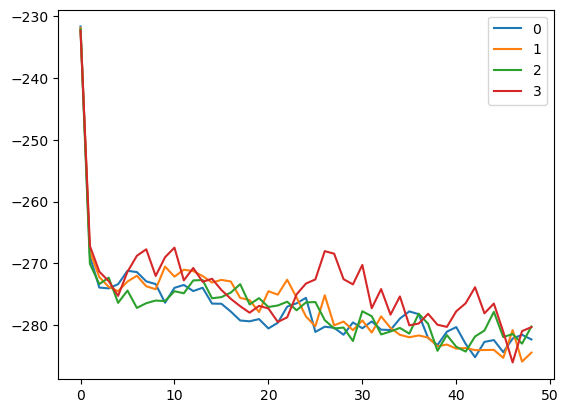

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

for idx, row in enumerate(energies):
    ax.plot(row, label=idx)
ax.legend()

In [ ]:
# let's compute 

In [11]:
# compute free energy difference using MBAR
from pymbar import MBAR
N_k = np.array([len(traj) * val for val, traj in zip(range(1, 5),trajs)])



(4, 88)

In [10]:
# we need the energies of each configuration _in each state_, i.e. not just the configuration that it came from
# need to evaluate each of the 88 states for each configuration, 
mbar = MBAR(energies, N_k=N_k ,verbose=True)

K (total states) = 4, total samples = 88
880


ParameterError: The sum of all N_k must equal the total number of samples (length of second dimension of u_kn.

In [7]:
88 * 4

352